In [8]:
from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib
import PIL.Image as Image
import cv2
import torch
from IPython.display import display
from sklearn.model_selection import train_test_split
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10
np.random.seed(42)

In [34]:
with open("../data/Date-Real/annotations.json") as f:
    data = json.load(f)


In [42]:
data_list = []

for k, v in data.items():
    a = {k: v }
    data_list.append(a)

In [43]:
data_list[0]

{'img_00001.jpg': {'height': 35,
  'width': 139,
  'ann': [{'cls': 'year', 'bbox': [4, 4, 59, 31], 'transcription': '2021'},
   {'cls': 'month', 'bbox': [70, 3, 99, 30], 'transcription': '05'},
   {'cls': 'day', 'bbox': [107, 4, 135, 30], 'transcription': '23'}]}}

In [44]:
train_ds, val_ds = train_test_split(data_list, test_size=0.1, random_state=42)
len(train_ds), len(val_ds)

(459, 51)

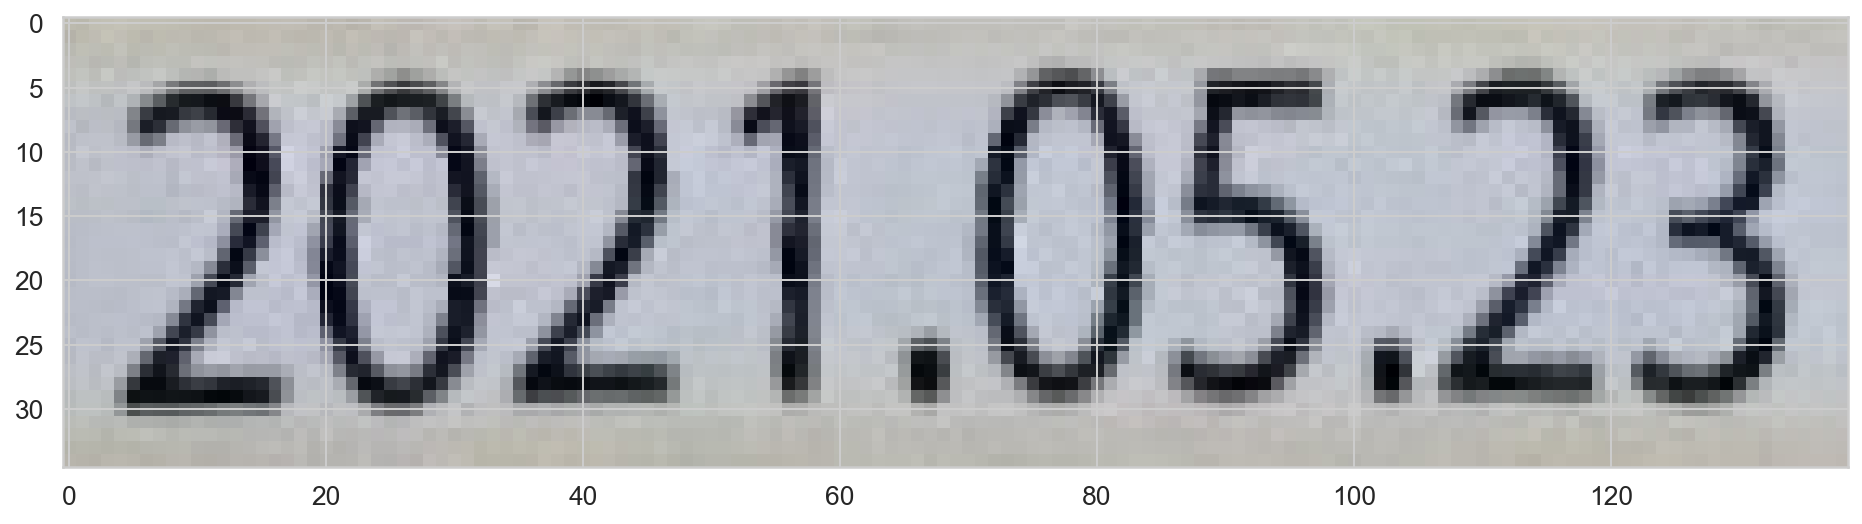

In [64]:
row = train_ds[10]
image = row.keys().__iter__().__next__()
img = Image.open("../data/Date-Real/images/" + image)
img = img.convert('RGB')
plt.imshow(img)

In [65]:
row

{'img_00001.jpg': {'height': 35,
  'width': 139,
  'ann': [{'cls': 'year', 'bbox': [4, 4, 59, 31], 'transcription': '2021'},
   {'cls': 'month', 'bbox': [70, 3, 99, 30], 'transcription': '05'},
   {'cls': 'day', 'bbox': [107, 4, 135, 30], 'transcription': '23'}]}}

In [67]:
img = cv2.imread("../data/Date-Real/images/" + image, cv2.IMREAD_COLOR)
img.shape

(35, 139, 3)

In [89]:
r = row.items().__iter__().__next__()
r

('img_00001.jpg',
 {'height': 35,
  'width': 139,
  'ann': [{'cls': 'year', 'bbox': [4, 4, 59, 31], 'transcription': '2021'},
   {'cls': 'month', 'bbox': [70, 3, 99, 30], 'transcription': '05'},
   {'cls': 'day', 'bbox': [107, 4, 135, 30], 'transcription': '23'}]})

In [103]:
r[1]['height']

35

In [83]:
w = r[1]['width']
h = r[1]['height']


{'cls': 'year', 'bbox': [4, 4, 59, 31], 'transcription': '2021'}
{'cls': 'month', 'bbox': [70, 3, 99, 30], 'transcription': '05'}
{'cls': 'day', 'bbox': [107, 4, 135, 30], 'transcription': '23'}
